In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy import stats # type: ignore
import numpy as np # type: ignore
import seaborn as sns  # type: ignore

df = pd.read_csv('C:/Users/nejat/AIM Projects/data/sierraleone-bumbuna.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
#Summary Statistics
summary_stats = df.describe()
summary_stats

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
# Check for missing values in GHI, DNI, and DHI
missing_values = df[['GHI', 'DNI', 'DHI']].isnull().sum()
print("Missing values in GHI, DNI, and DHI:\n", missing_values)

Missing values in GHI, DNI, and DHI:
 GHI    0
DNI    0
DHI    0
dtype: int64


In [4]:
# Check for negative values in GHI, DNI, DHI
print("Negative values in GHI, DNI, DHI:")
print(df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)])
df = df[(df['GHI'] >= 0) & (df['DNI'] >= 0) & (df['DHI'] >= 0)]

Negative values in GHI, DNI, DHI:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0

In [5]:
# Check for outliers in GHI, DNI, DHI, ModA, ModB, WS, WSgust
z_scores_1 = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))
outliers_1 = df[(z_scores_1 > 3).any(axis=1)]

z_scores_2 = np.abs(stats.zscore(df[['ModA', 'ModB', 'WS', 'WSgust']]))
outliers_2 = df[(z_scores_2 > 3).any(axis=1)]

print("\nPotential outliers in GHI, DNI, and DHI:\n", outliers_1)
print("\nPotential outliers in ModA, ModB, WS, or WSgust:\n", outliers_2)


Potential outliers in GHI, DNI, and DHI:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
221092  2022-04-01 12:53  1162.0  470.2  683.2  1155.0  1131.0  33.6  55.6   
221093  2022-04-01 12:54  1174.0  473.9  692.1  1167.0  1142.0  33.6  55.1   
221094  2022-04-01 12:55  1048.0  362.3  680.1  1043.0  1020.0  33.7  54.8   
298822  2022-05-25 12:23   877.0  191.0  680.7   844.0   831.0  28.4  76.5   
298859  2022-05-25 13:00  1337.0  922.0  420.0  1246.0  1218.0  28.7  76.2   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
517697  2022-10-24 12:18  1141.0  452.6  704.8  1193.0  1168.0  29.2  77.8   
517698  2022-10-24 12:19   951.0  252.8  702.3   977.0   956.0  29.1  77.1   
517699  2022-10-24 12:20  1078.0  402.0  688.6  1118.0  1093.0  29.1  77.1   
517724  2022-10-24 12:45  1006.0  333.9  679.0  1038.0  1015.0  30.3  73.4   
517728  2022-10-24 12:49   974.0  296.2  682.1  1008.0   985.0  30.0  73.3   

         WS  WSgust 

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

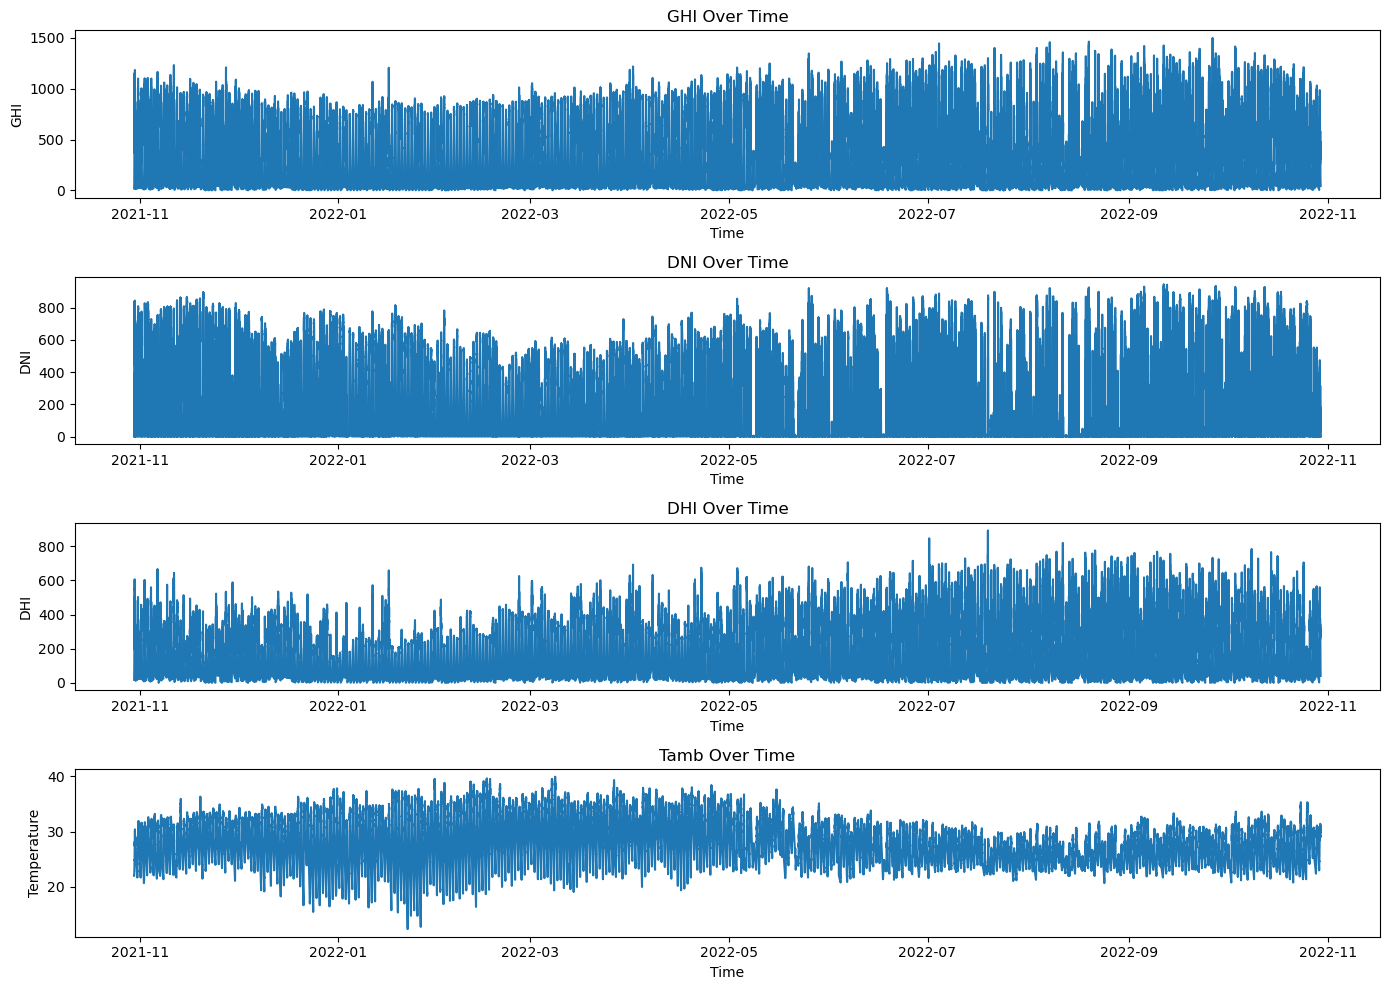

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.set_index('Timestamp', inplace=True)
df_clean = df[['GHI', 'DNI', 'DHI', 'Tamb']].dropna()

plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
sns.lineplot(data=df, x=df.index, y='GHI')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI')

plt.subplot(4, 1, 2)
sns.lineplot(data=df, x=df.index, y='DNI')
plt.title('DNI Over Time')
plt.xlabel('Time')
plt.ylabel('DNI')

plt.subplot(4, 1, 3)
sns.lineplot(data=df, x=df.index, y='DHI')
plt.title('DHI Over Time')
plt.xlabel('Time')
plt.ylabel('DHI')

plt.subplot(4, 1, 4)
sns.lineplot(data=df, x=df.index, y='Tamb')
plt.title('Tamb Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

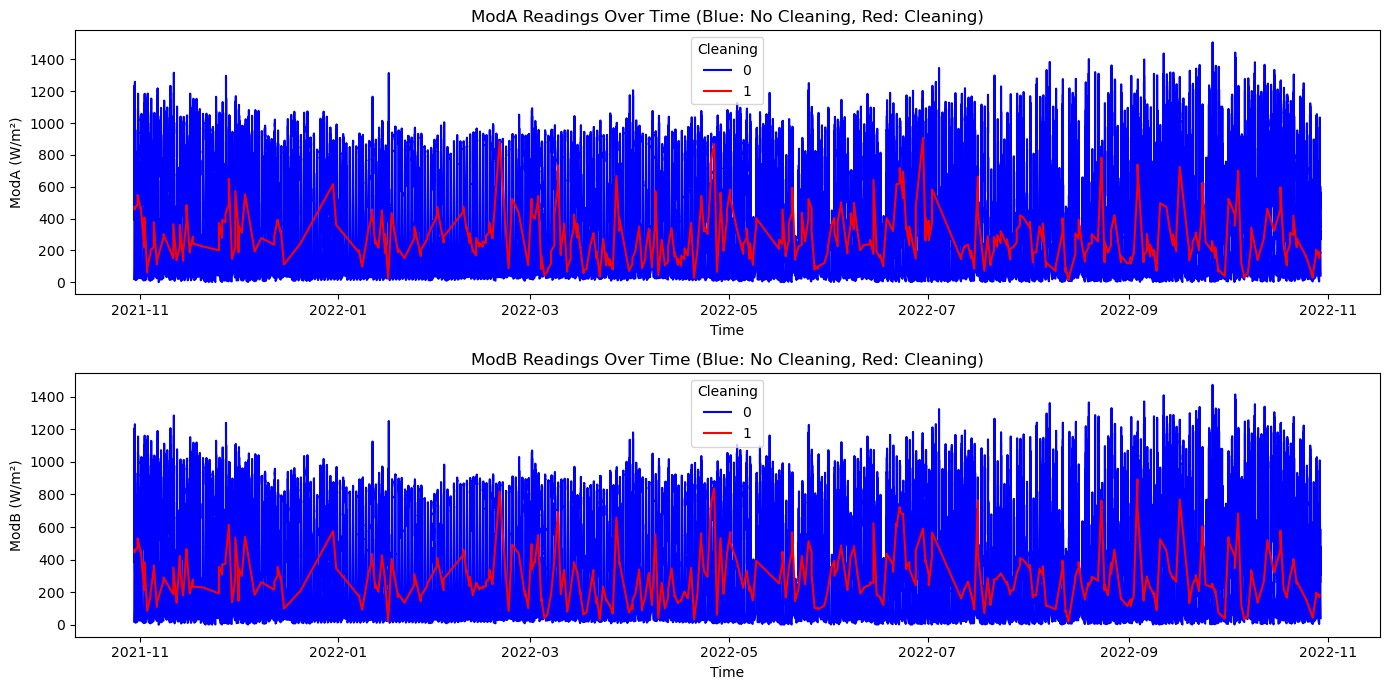

In [7]:
# Plot sensor readings ModA and ModB over time based on Cleaning status
plt.figure(figsize=(14, 7))

# ModA plot
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette={0: 'blue', 1: 'red'})
plt.title('ModA Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
plt.xlabel('Time')
plt.ylabel('ModA (W/m²)')

# ModB plot
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette={0: 'blue', 1: 'red'})
plt.title('ModB Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
plt.xlabel('Time')
plt.ylabel('ModB (W/m²)')

plt.tight_layout()
plt.show()


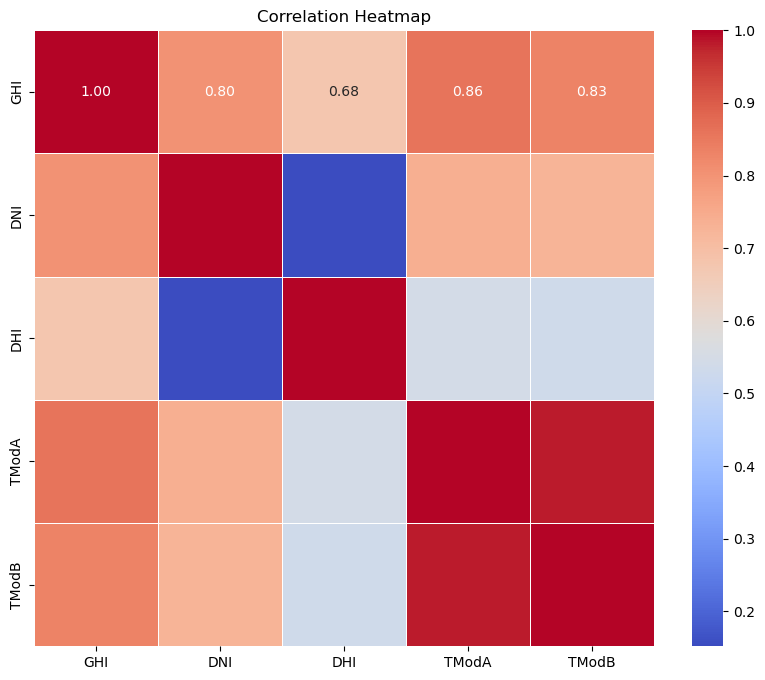

In [8]:
# Correlation matrix for solar radiation components and temperature measures
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[correlation_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


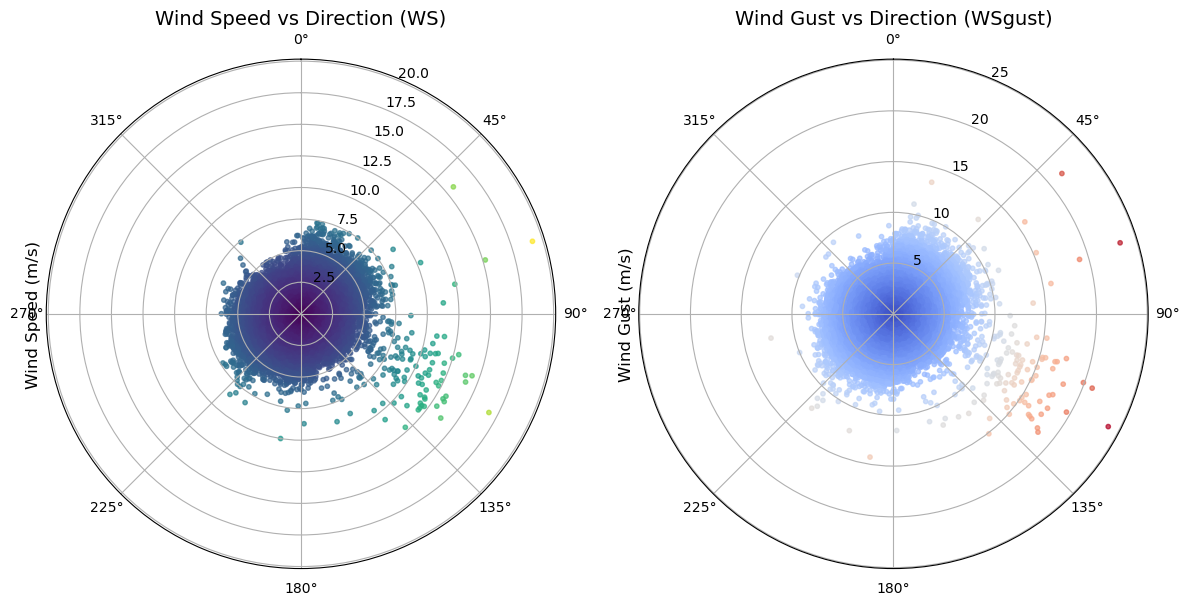

In [9]:
wind_data = df[['WS', 'WSgust', 'WD']].dropna()

wind_data['WD_radians'] = np.radians(wind_data['WD'])

plt.figure(figsize=(12, 6))
# Subplot 1: Wind Speed (WS) against Wind Direction (WD)
ax1 = plt.subplot(1, 2, 1, projection='polar')
ax1.scatter(wind_data['WD_radians'], wind_data['WS'], alpha=0.7, s=10, c=wind_data['WS'], cmap='viridis')
ax1.set_theta_direction(-1)  # Set the direction of theta
ax1.set_theta_offset(np.pi / 2.0)  # Set the offset for proper orientation (North = 0 degrees)
ax1.set_title('Wind Speed vs Direction (WS)', fontsize=14)
ax1.set_ylabel('Wind Speed (m/s)', fontsize=12)

# Subplot 2: Wind Gust Speed (WSgust) against Wind Direction (WD)
ax2 = plt.subplot(1, 2, 2, projection='polar')
ax2.scatter(wind_data['WD_radians'], wind_data['WSgust'], alpha=0.7, s=10, c=wind_data['WSgust'], cmap='coolwarm')
ax2.set_theta_direction(-1)
ax2.set_theta_offset(np.pi / 2.0)
ax2.set_title('Wind Gust vs Direction (WSgust)', fontsize=14)
ax2.set_ylabel('Wind Gust (m/s)', fontsize=12)

plt.tight_layout()
plt.show()

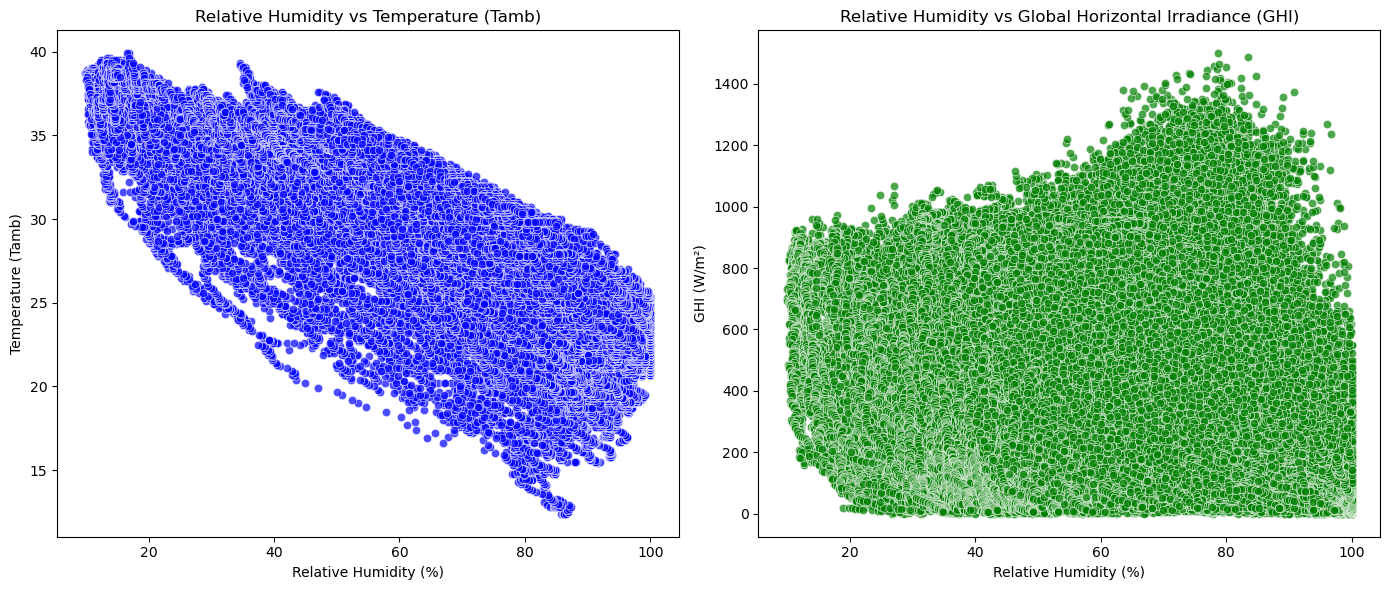

In [10]:
temp_data = df[['RH', 'Tamb', 'GHI']].dropna()

# Scatter plot: RH vs Temperature
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=temp_data, x='RH', y='Tamb', alpha=0.7, color='blue')
plt.title('Relative Humidity vs Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (Tamb)')

# Scatter plot: RH vs Solar Radiation (GHI)
plt.subplot(1, 2, 2)
sns.scatterplot(data=temp_data, x='RH', y='GHI', alpha=0.7, color='green')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

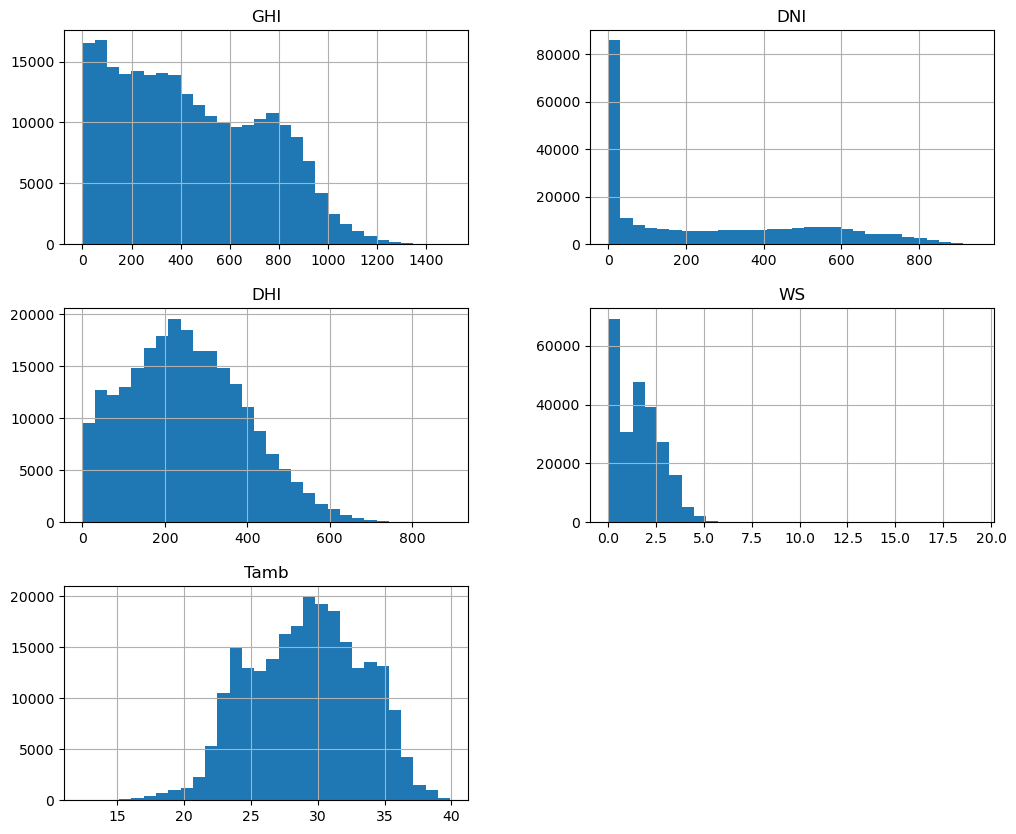

In [11]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df[variables].hist(bins=30, figsize=(12, 10))
plt.show()

In [12]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
z_scores = np.abs(stats.zscore(df[columns_to_check].dropna()))

outliers = (z_scores > 3).any(axis=1)
outliers_data = df[outliers]
print("Data points flagged as outliers based on Z-scores:\n", outliers_data)

Data points flagged as outliers based on Z-scores:
                        GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2021-10-31 17:36:00   35.2    3.6   34.3   35.1   33.1  31.2  66.8  7.5   
2021-10-31 17:37:00   28.9    0.3   29.0   30.8   29.0  30.9  66.7  6.2   
2021-10-31 17:39:00   24.6    0.2   24.8   28.9   27.4  30.2  63.6  5.3   
2021-10-31 17:40:00   23.9    0.2   24.3   29.4   28.0  29.9  64.5  5.3   
2021-11-05 15:45:00  253.6    1.2  254.7  251.4  241.3  31.7  64.7  5.7   
...                    ...    ...    ...    ...    ...   ...   ...  ...   
2022-10-24 17:23:00   48.1   42.3   36.5   42.8   40.9  28.2  73.6  6.8   
2022-10-24 17:24:00   32.6    6.5   30.1   30.1   28.5  28.1  71.9  7.5   
2022-10-24 17:25:00   25.4    0.1   24.5   25.4   24.2  28.0  72.4  6.1   
2022-10-25 13:53:00  888.0  811.0  168.1  915.0  896.0  34.7  54.7  5.3   
2022-10-25 15:14:00  699.6  718.6  187.4  711.6 

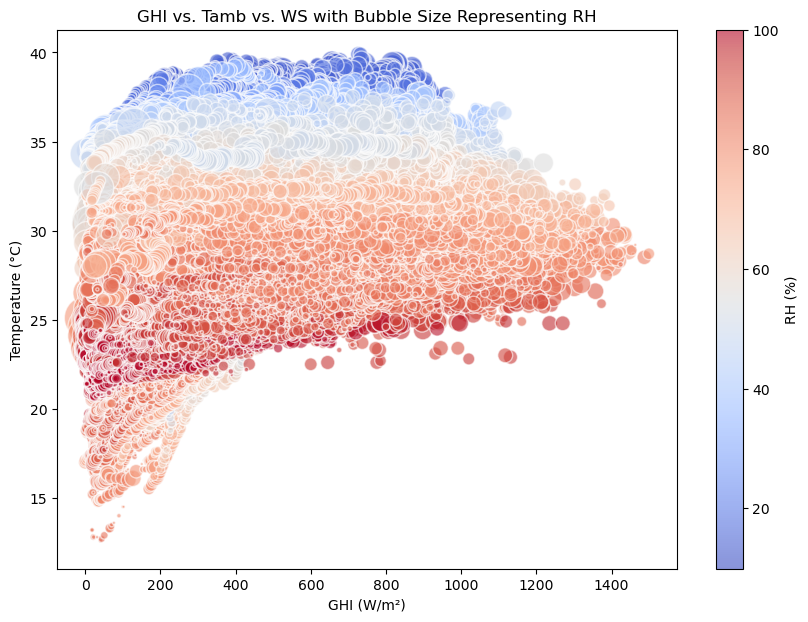

In [13]:
plt.figure(figsize=(10, 7))

bubble_size = df['WS'] * 50 
plt.scatter(df['GHI'], df['Tamb'], s=bubble_size, c=df['RH'], cmap='coolwarm', alpha=0.6, edgecolor='w')

plt.title('GHI vs. Tamb vs. WS with Bubble Size Representing RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (°C)')
plt.colorbar(label='RH (%)')
plt.show()

In [15]:
# Create a copy of the original DataFrame
df_clean = df.copy()

# Drop columns that are completely null
df_clean = df_clean.dropna(axis=1, how='all')
dropped_columns = set(df.columns) - set(df_clean.columns)
print("Dropped columns (completely null):", dropped_columns)

# Fill missing values with mean
df_clean = df_clean.fillna(df_clean.mean())
missing_values_after_fill = df_clean.isnull().sum()
print("Remaining missing values after filling with mean:\n", missing_values_after_fill)


# Handle negative values by replacing them with NaN
df_clean.loc[df_clean['GHI'] < 0, 'GHI'] = pd.NA
negative_ghi = df_clean['GHI'][df_clean['GHI'] < 0].count()
nan_in_ghi = df_clean['GHI'].isna().sum()
print(f"Negative GHI values after cleaning: {negative_ghi}")
print(f"NaN values in GHI after replacing negative values: {nan_in_ghi}")


Dropped columns (completely null): {'Comments'}
Remaining missing values after filling with mean:
 GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
Negative GHI values after cleaning: 0
NaN values in GHI after replacing negative values: 0
